2D heat equation solver
[[[  0.           0.           0.           0.           0.        ]
  [  0.           0.           0.           0.           0.        ]
  [  0.           0.           0.           0.           0.        ]
  [  0.           0.           0.           0.           0.        ]
  [  0.         100.         100.         100.           0.        ]]

 [[  0.           0.           0.           0.           0.        ]
  [  0.           0.           0.           0.           0.        ]
  [  0.           0.           0.           0.           0.        ]
  [  0.          25.          25.          25.           0.        ]
  [  0.         100.         100.         100.           0.        ]]

 [[  0.           0.           0.           0.           0.        ]
  [  0.           0.           0.           0.           0.        ]
  [  0.           6.25         6.25         6.25         0.        ]
  [  0.          31.25        37.5         31.25         0.        ]
  [  0

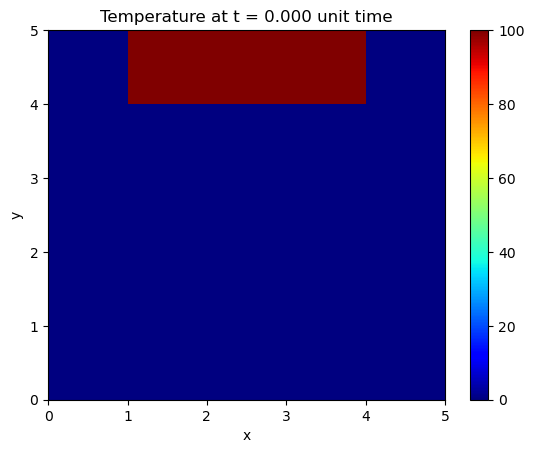

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

print("2D heat equation solver")

plate_length = 5
max_iter_time = 7

alpha = 2
delta_x = 1

delta_t = (delta_x ** 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ** 2)

# Initialize solution: the grid of u(k, i, j)
u = np.empty((max_iter_time, plate_length, plate_length))

# Initial condition everywhere inside the grid
u_initial = 0

# Boundary conditions
u_top = 100.0
u_left = 0.0
u_bottom = 0.0
u_right = 0.0

# Set the initial condition
u.fill(u_initial)

# Set the boundary conditions
u[:, (plate_length-1):, :] = u_top
u[:, :, :1] = u_left
u[:, :1, 1:] = u_bottom
u[:, :, (plate_length-1):] = u_right

def calculate(u):
    for k in range(0, max_iter_time-1, 1):
        for i in range(1, plate_length-1, delta_x):
            for j in range(1, plate_length-1, delta_x):
                u[k + 1, i, j] = gamma * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j]) + u[k][i][j]

    return u

def plotheatmap(u_k, k):
    # Clear the current plot figure
    plt.clf()

    plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.colorbar()

    return plt

# Do the calculation here
u = calculate(u)

print(u)

def animate(k):
    plotheatmap(u[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter_time, repeat=False)
anim.save("heat_equation_solution2.gif")

print("Done!")

plt

[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 1.00000000e+02 1.00000000e+02 ... 1.00000000e+02
   1.00000000e+02 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000

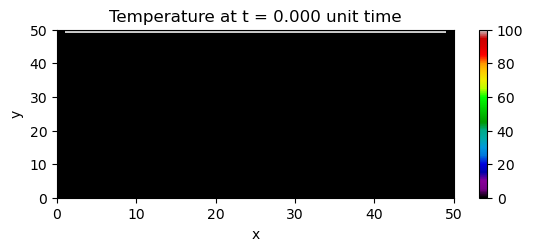

In [80]:
import numpy as np
import seaborn as sn 
'''
//3d array
numpy.empty(shape, dtype=float, order='C', *, like=None)
Return a new array of given shape and type, without initializing entries.
'''
left=0.0
right=0.0
top=100.0
bottom=0.0

length=50
time=75

alpha = 2.0
delta_x = 1

# Calculated params
delta_t = (delta_x ** 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ** 2)

space=np.empty((time,length,length))
u_initial = 0


# space

# //boundary lengths
space.fill(u_initial)
space[:,length-1:,:]=top
space[:,:,:1]=left
space[:,:,length-1:]=right

# space

def wave_value(space):
    for t in range(0,time-1):
        for x in range(1,length-1):
            for y in range(1, length-1):
                space[t+1][x][y]=gamma*(space[t][x+1][y]+space[t][x-1][y]+space[t][x][y+1]+space[t][x][y-1]-4*space[t][x][y])+space[t][x][y]
                

    return space

val=wave_value(space)
print(val)

def plotheatmap(u_k, k):
    # Clear the current plot figure
    plt.clf()

    plt.subplot(2, 1, 1)
    plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.pcolormesh(u_k, cmap= plt.get_cmap('nipy_spectral'), vmin=0, vmax=100)
    plt.colorbar()

  
    return plt

# Do the calculation here
u = calculate(u)

def animate(t):
    plotheatmap(space[t], t)

anim = animation.FuncAnimation(plt.figure(), animate, interval=50, frames=time, repeat=False)
anim.save("heat_equation_solution6.gif")




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D


print("2D heat equation solver")

plate_length = 50
max_iter_time = 75

alpha = 2
delta_x = 1

delta_t = (delta_x ** 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ** 2)

# Initialize solution: the grid of u(k, i, j)
u = np.empty((max_iter_time, plate_length, plate_length))

# Initial condition everywhere inside the grid
u_initial = 0

# Boundary conditions
u_top = 100.0
u_left = 0.0
u_bottom = 0.0
u_right = 0.0

# Set the initial condition
u.fill(u_initial)

# Set the boundary conditions
u[:, (plate_length-1):, :] = u_top
u[:, :, :1] = u_left
u[:, :1, 1:] = u_bottom
u[:, :, (plate_length-1):] = u_right

def calculate(u):
    for k in range(0, max_iter_time-1, 1):
        for i in range(1, plate_length-1, delta_x):
            for j in range(1, plate_length-1, delta_x):
                u[k + 1, i, j] = gamma * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j]) + u[k][i][j]

    return u



# Do the calculation here
u = calculate(u)



def animate_surface(frame):
    plt.clf()
    ax = fig.add_subplot(projection='3d')
    ax.set_title(f"Temperature at t = {frame*delta_t:.3f} unit time")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("Temperature")
    X, Y = np.meshgrid(np.arange(plate_length), np.arange(plate_length))
    ax.plot_surface(X, Y, u[frame], cmap='viridis')



fig = plt.figure()
anim_surface = FuncAnimation(fig, animate_surface, frames=max_iter_time, interval=5)
plt.show()

2D heat equation solver


<Figure size 640x480 with 0 Axes>